# CellSystem

A simple framework to simulate dinamical systems flexible enough to allow adding custom 'loggers', that is, observer classes that record the relevant steps of the simulations.

This was created to simulate cancer growth, while allowing to couple mutations and ancestry logging to study tumour phylogeny reconstruction algorithms.

![Use case](assets/sidebyside.png)

## Example

A use case integrated in the repository:


```python
from cellsystem import *

# The cell system will simulate cell growth
# while tracking the steps in that process.
system = CellSystem(grid_dimensions=(10, 10))

# Initialize the first cell
# in the middle of the grid
system.seed()


   # New cell 0 added @ (5, 5)


# Take 35 steps forward in time
system.run(steps=30)


    # Cell no. 0 dividing @ (5, 5)
    # 	New cells: 2 @ (4, 5) and 1 @ (6, 6)
    # Cell no. 2 mutating @ site (4, 5) (father 0)
    # 		 Initial mutations: []
    #                 	 Initial genome: AAAAAAAAAA
    # 		 Final mutations: [(3, 'C')]
    #                 	 Final genome: AAACAAAAAA
    # Cell no. 1 dividing @ (6, 6)
    # 	New cells: 4 @ (6, 6) and 3 @ (5, 6)
    # Cell no. 2 death @ site (4, 5) (father 0)
    # Cell no. 3 migrating from site (5, 6) (father 1)
    # 	 New site: (4, 5)
    # Cell no. 4 death @ site (6, 6) (father 1)
    # Cell no. 3 dividing @ (4, 5)
    # 	New cells: 6 @ (3, 6) and 5 @ (3, 5)
    # ...
    # ...
    # ...


# Prepare to explore the simulation logs
history = system['log']

tree_style = {'show_leaf_name' : True,
              'mode' : 'c',        # Circular tree
              'arc_start' : -135,  # Degrees
              'arc_span' : 270 }   # Degrees also


# Lookup the tree formed by cellular division
history.ancestry().show(styling=tree_style)
```

![png](assets/output_6_0.png)

```python
# Now, remove cells that are no longer alive
history.ancestry(prune_death=True).show(styling=tree_style)
```

![png](assets/output_7_0.png)

```python
# Now, check out the tree formed by the mutations 
history.mutations().show(styling=tree_style)
```

![png](assets/output_8_0.png)

```python
# Remove genomes with no living representatives.
history.mutations(prune_death=True).show(styling=tree_style)
```

![png](assets/output_9_0.png)

_For more examples and usage, please refer to the [Wiki](wikigoeshere.com)._

## Meta

Ad115 – [@Andresio115](https://twitter.com/Andresio115) – a.garcia230395@gmail.com

Distributed under the MIT license. See [LICENSE](LICENSE) for more information.

## Contributing

1. Fork it (<https://github.com/Ad115/Cell-System/fork>)
2. Create your feature branch (`git checkout -b feature/fooBar`)
3. Commit your changes (`git commit -am 'Add some fooBar'`)
4. Push to the branch (`git push origin feature/fooBar`)
5. Create a new Pull Request


In [18]:
from cellsystem import *

# The cell system will simulate cell growth
# while tracking the steps in that process.
system = CellSystem(grid_dimensions=(100, 100))

from cellsystem.logging.geometric import GeometricLog
system['log'].register(GeometricLog(), name='geometry')

In [19]:
# Initialize the first cell
# in the middle of the grid
system.seed()


   # New cell 0 added @ (5, 5)


# Take 30 steps forward in time
system.run(steps=30)


    # Cell no. 0 dividing @ (5, 5)
    #     New cells: 2 @ (4, 5) and 1 @ (6, 6)
    # Cell no. 2 mutating @ site (4, 5) (father 0)
    #          Initial mutations: []
    #                      Initial genome: AAAAAAAAAA
    #          Final mutations: [(3, 'C')]
    #                      Final genome: AAACAAAAAA
    # Cell no. 1 dividing @ (6, 6)
    #     New cells: 4 @ (6, 6) and 3 @ (5, 6)
    # Cell no. 2 death @ site (4, 5) (father 0)
    # Cell no. 3 migrating from site (5, 6) (father 1)
    #      New site: (4, 5)
    # Cell no. 4 death @ site (6, 6) (father 1)
    # Cell no. 3 dividing @ (4, 5)
    #     New cells: 6 @ (3, 6) and 5 @ (3, 5)
    # ...
    # ...
    # ...

New cell 0 added @ (50, 50)
Cell no. 0 dividing @ (50, 50)
	New cells: 2 @ (50, 50) and 1 @ (51, 49)
Cell no. 1 death @ site (51, 49) (father None)
Cell no. 2 mutating @ site (50, 50) (father 0)
		 Initial mutations: []
                	 Initial genome: AAAAAAAAAA
		 Final mutations: [(6, 'G')]
                	 Final genome: AAAAAAGAAA
Cell no. 2 dividing @ (50, 50)
	New cells: 4 @ (49, 49) and 3 @ (50, 51)
Cell no. 4 mutating @ site (49, 49) (father 2)
		 Initial mutations: [(6, 'G')]
                	 Initial genome: AAAAAAGAAA
		 Final mutations: [(6, 'G'), (8, 'A')]
                	 Final genome: AAAAAAGAAA
Cell no. 3 death @ site (50, 51) (father 2)
Cell no. 4 mutating @ site (49, 49) (father 2)
		 Initial mutations: [(6, 'G'), (8, 'A')]
                	 Initial genome: AAAAAAGAAA
		 Final mutations: [(6, 'G'), (8, 'A'), (1, 'C')]
                	 Final genome: ACAAAAGAAA
Cell no. 4 mutating @ site (49, 49) (father 2)
		 Initial mutations: [(6, 'G'), (8, 'A'), (1, 'C')]
      

In [20]:
# Prepare to explore the simulations logs
history = system['log']

# Tree rendering style
tree_style = {'show_leaf_name' : True,
              'mode' : 'c',        # Circular
              'arc_start' : -157.5,  # Degrees
              'arc_span' : 315 }   # Degrees also

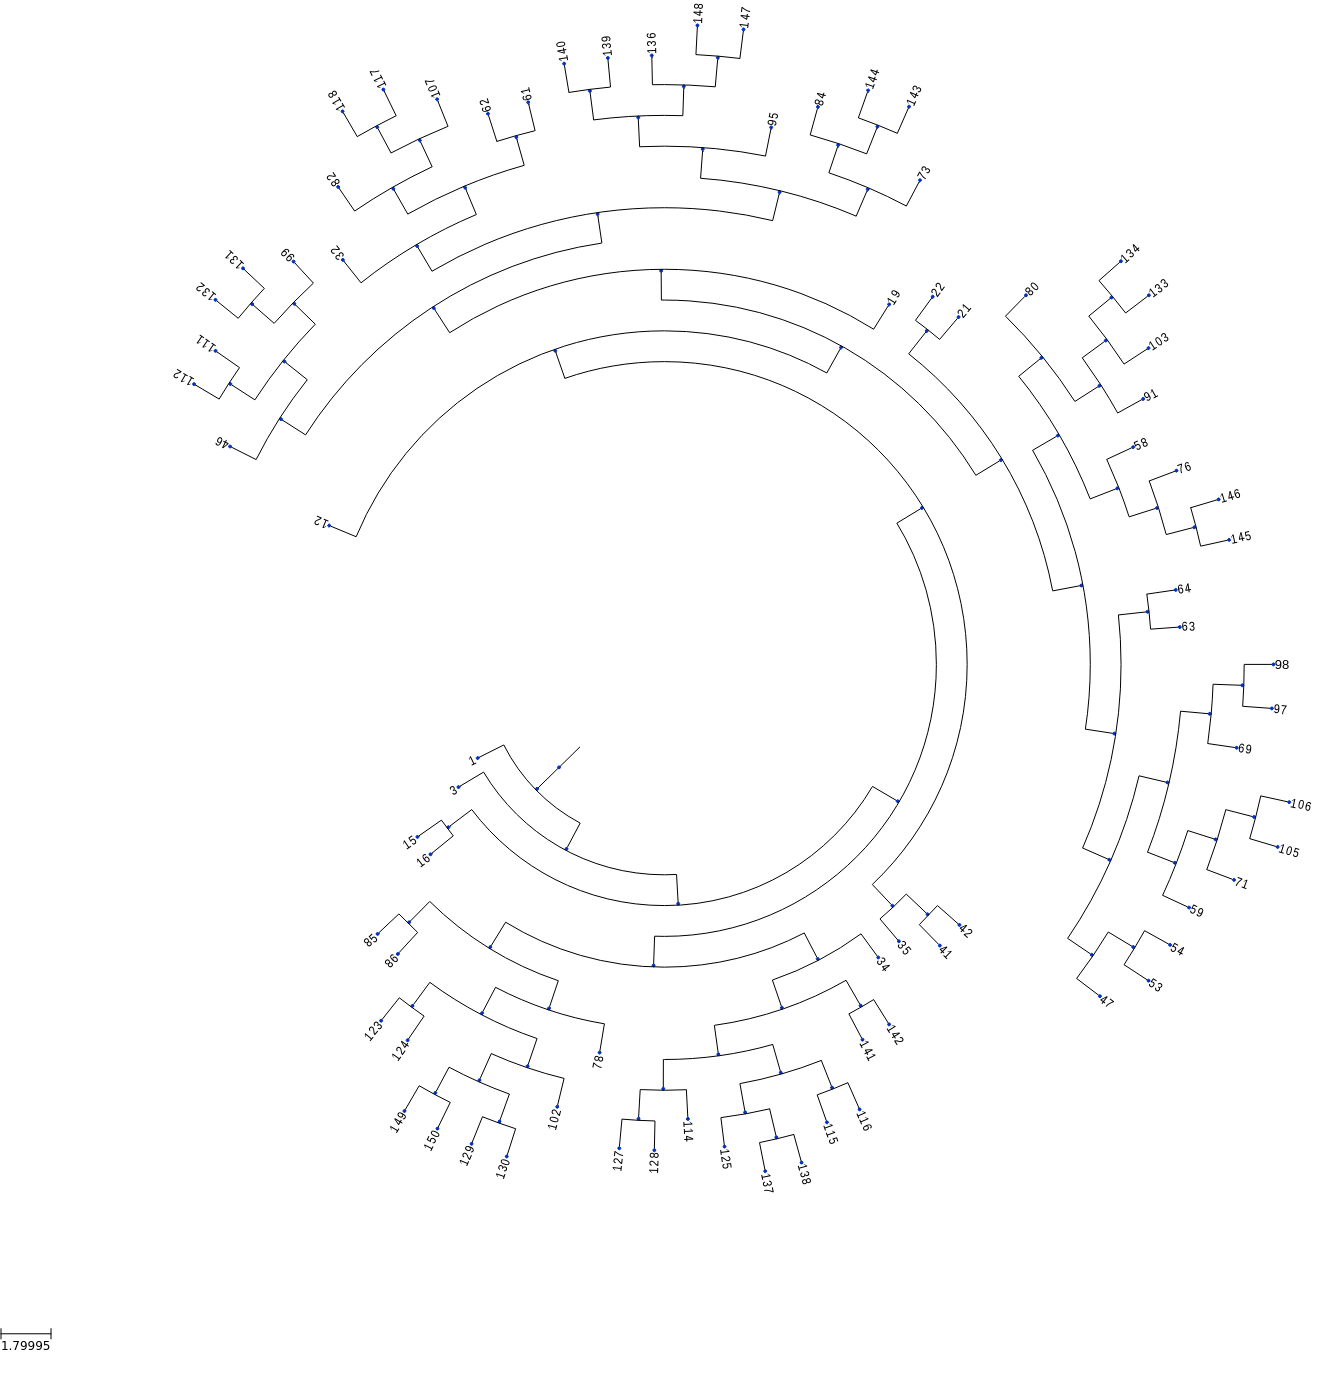

In [21]:
# Lookup the tree formed by cellular division
history.ancestry().show(inline=True,
                        styling=tree_style)

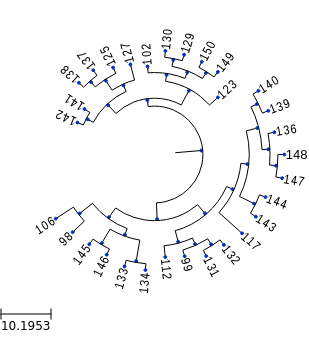

In [22]:
# Now, remove cells that are no longer alive
history.ancestry(prune_death=True).show(inline=True,
                                        styling=tree_style)

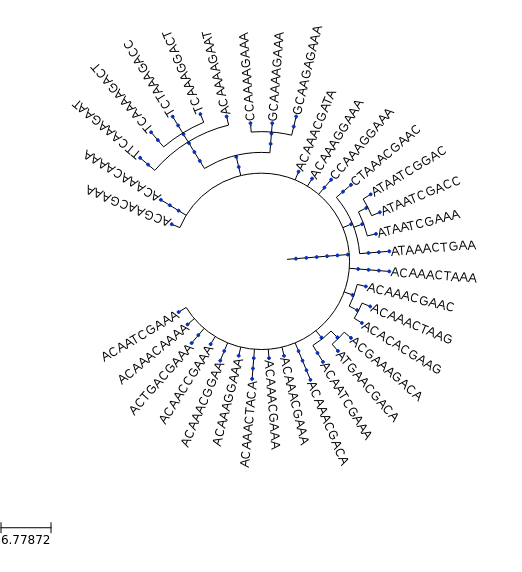

In [23]:
# Now, check out the tree formed by the mutations 
history.mutations().show(inline=True, 
                         styling=tree_style)

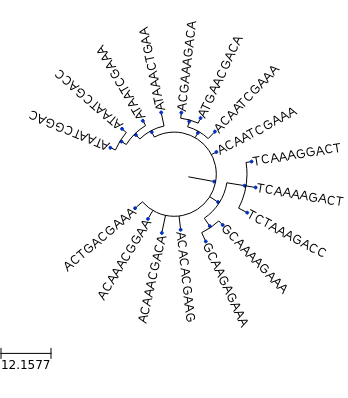

In [24]:
# Remove genomes whose representatives are no longer alive
history.mutations(prune_death=True).show(inline=True, 
                                         styling=tree_style)

In [25]:
history.logs['geometry'].changes

[(0, (50, 50)),
 (0, ((2, (50, 50)), (1, (51, 49)))),
 (1, None),
 (2, ((4, (49, 49)), (3, (50, 51)))),
 (3, None),
 (4, ((6, (49, 48)), (5, (48, 48)))),
 (6, ((8, (50, 47)), (7, (50, 47)))),
 (5, (48, 47)),
 (7, (51, 46)),
 (8, ((10, (49, 46)), (9, (49, 47)))),
 (7, (51, 47)),
 (9, (50, 46)),
 (10, (50, 45)),
 (5, (49, 47)),
 (7, (52, 47)),
 (10, ((12, (51, 44)), (11, (50, 44)))),
 (5, (50, 47)),
 (11, ((14, (51, 44)), (13, (49, 44)))),
 (5, ((16, (49, 48)), (15, (49, 48)))),
 (12, (51, 45)),
 (12, None),
 (16, (48, 48)),
 (15, (48, 47)),
 (7, (51, 46)),
 (13, (48, 45)),
 (13, ((18, (48, 45)), (17, (48, 45)))),
 (15, None),
 (14, ((20, (50, 45)), (19, (50, 44)))),
 (16, (47, 48)),
 (16, None),
 (18, ((22, (49, 44)), (21, (47, 46)))),
 (9, (51, 47)),
 (20, ((24, (49, 45)), (23, (50, 46)))),
 (7, ((26, (51, 45)), (25, (51, 45)))),
 (23, ((28, (50, 45)), (27, (51, 47)))),
 (19, (50, 45)),
 (26, (51, 44)),
 (9, (52, 48)),
 (17, ((30, (48, 44)), (29, (48, 44)))),
 (28, ((32, (49, 45)), (31

In [26]:
geometry = history.logs['geometry']

In [27]:
timelines = geometry.get_timelines()

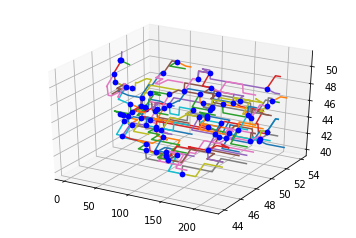

In [28]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

for cell,timeline in timelines.items():
    x, y, z = zip(*timeline)
    ax.plot(x, y, z)
    ax.scatter(x[0], y[0], z[0], c='b', marker='o')   # End point
    ax.legend()
plt.show()

In [42]:
plot = []
for t,state in enumerate(positions[1:]):
    for position in state:
        i,j = position
        plot.append((i,j,t))
plot

[(50, 50, 0),
 (50, 51, 1),
 (49, 51, 1),
 (49, 52, 2),
 (49, 51, 2),
 (49, 52, 3),
 (48, 51, 4),
 (49, 51, 5),
 (47, 50, 5),
 (47, 50, 6),
 (50, 52, 6),
 (50, 52, 6),
 (50, 52, 7),
 (50, 52, 7),
 (47, 51, 7),
 (46, 51, 7),
 (50, 52, 8),
 (47, 51, 8),
 (46, 51, 8),
 (47, 51, 9),
 (46, 51, 9),
 (50, 51, 9),
 (51, 52, 9),
 (47, 51, 10),
 (50, 51, 10),
 (51, 52, 10),
 (47, 51, 11),
 (50, 51, 11),
 (47, 51, 12),
 (49, 51, 12),
 (50, 52, 12),
 (47, 51, 13),
 (48, 50, 13),
 (50, 52, 13),
 (48, 50, 14),
 (50, 52, 14),
 (47, 51, 14),
 (48, 52, 14),
 (48, 50, 15),
 (50, 52, 15),
 (48, 52, 15),
 (48, 51, 15),
 (48, 50, 15),
 (50, 52, 16),
 (48, 52, 16),
 (48, 51, 16),
 (48, 50, 16),
 (49, 49, 16),
 (49, 51, 16),
 (48, 52, 17),
 (48, 51, 17),
 (48, 50, 17),
 (49, 49, 17),
 (49, 51, 17),
 (51, 51, 17),
 (49, 53, 17),
 (48, 51, 18),
 (48, 50, 18),
 (49, 49, 18),
 (49, 51, 18),
 (51, 51, 18),
 (49, 53, 18),
 (48, 50, 19),
 (49, 49, 19),
 (49, 51, 19),
 (51, 51, 19),
 (49, 53, 19),
 (47, 51, 19),
 (4

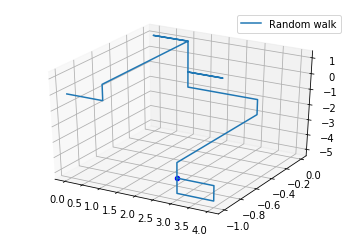

In [43]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

xyz = []
cur = [0, 0, 0]

for _ in range(20):
    axis = random.randrange(0, 3)
    cur[axis] += random.choice([-1, 1])
    xyz.append(cur[:])

x, y, z = zip(*xyz)
ax.plot(x, y, z, label='Random walk')
ax.scatter(x[-1], y[-1], z[-1], c='b', marker='o')   # End point
ax.legend()
plt.show()

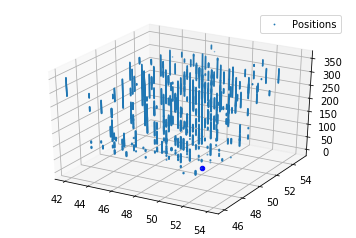

In [64]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = zip(*plot)
s = [1*0.9999**n for n in range(len(plot)) ]
ax.scatter(x[0], y[0], z[0], c='b', marker='o')   # End point
ax.scatter(x,y,z, label='Positions', s=s)
#ax.plot(x, y, z, label='Positions')
ax.legend()
plt.show()